In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [9]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [10]:
for j in range(n):
    qc_output.measure(j,j)

In [11]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

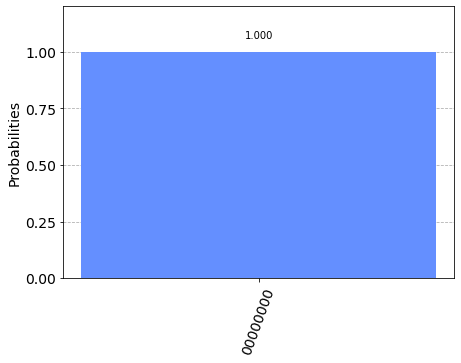

In [12]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [3]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

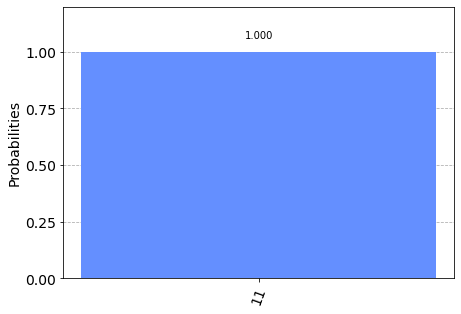

In [11]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [3]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

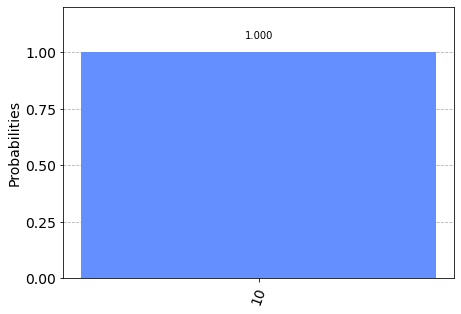

In [4]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [5]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [11]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('text')  # Let's view our circuit (text drawing is required for the 'Initialize' gate due to a known bug in qiskit)

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [8]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [9]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


In [12]:
qc.measure_all()
qc.draw('text')

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

In [13]:
qc.measure_all()
qc.draw('text')

┌─────────────────┐ ░ ┌─┐ ░ ┌─┐
    q_0: ┤ initialize(0,1) ├─░─┤M├─░─┤M├
         └─────────────────┘ ░ └╥┘ ░ └╥┘
 meas: 1/═══════════════════════╩═════╬═
                                0     ║ 
                                      ║ 
meas0: 1/═════════════════════════════╩═
                                      0

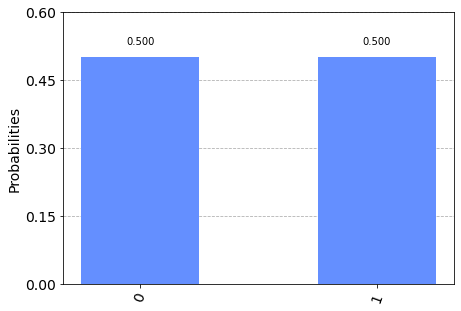

In [16]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [14]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q>

In [15]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


In [17]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')